In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model

from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from tensorflow.keras import layers
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory

import numpy as np

In [2]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 20
BATCH_SIZE = 16

In [3]:
new_base_dir = "./2-step/split data"

In [4]:
train_dataset = image_dataset_from_directory(
new_base_dir + "/train",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

validation_dataset = image_dataset_from_directory(
new_base_dir + "/val",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE,
)

test_dataset = image_dataset_from_directory(
new_base_dir + "/test",
image_size=(IMG_W, IMG_W),
batch_size=BATCH_SIZE
)

Found 2100 files belonging to 2 classes.
Found 450 files belonging to 2 classes.
Found 450 files belonging to 2 classes.


In [5]:
# base model

In [6]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 10s 48ms/step - loss: 0.4868 - accuracy: 0.7657 - true_positives: 695.0000 - true_negatives: 913.0000 - val_loss: 0.3728 - val_accuracy: 0.8444 - val_true_positives: 205.0000 - val_true_negatives: 175.0000
Epoch 2/20
132/132 [==============================] - 6s 42ms/step - loss: 0.3415 - accuracy: 0.8767 - true_positives: 909.0000 - true_negatives: 932.0000 - val_loss: 0.3864 - val_accuracy: 0.8333 - val_true_positives: 207.0000 - val_true_negatives: 168.0000
Epoch 3/20
132/132 [==============================] - 6s 41ms/step - loss: 0.3051 - accuracy: 0.8857 - true_positives: 910.0000 - true_negatives: 950.0000 - val_loss: 0.3429 - val_accuracy: 0.8600 - val_true_positives: 169.0000 - val_true_negatives: 218.0000
Epoch 4/20
132/132 [==============================] - 6s 42ms/step - loss: 0.2699 - accuracy: 0.8995 - true_positives: 924.0000 - true_negatives: 965.0000 - val_loss: 0.3145 - val_accuracy: 0.8778 - val_true_positives: 180

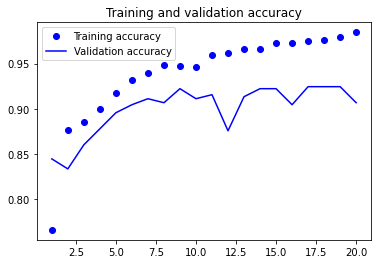

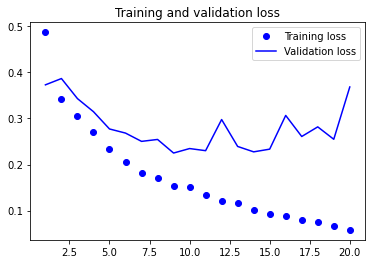

In [7]:
# test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

# print(f"Test accuracy: {test_acc:.3f}",
#       f"\nTest loss: {test_loss:.3f}",
#       f"\nTrue positive: {true_pos:.3f}",
#       f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [12]:
# kernel size = 2

In [13]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=2, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=2, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=2, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=2, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=2, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 7s 43ms/step - loss: 0.5026 - accuracy: 0.7690 - true_positives_2: 682.0000 - true_negatives_2: 933.0000 - val_loss: 0.3300 - val_accuracy: 0.9089 - val_true_positives_2: 197.0000 - val_true_negatives_2: 212.0000
Epoch 2/20
132/132 [==============================] - 6s 40ms/step - loss: 0.3024 - accuracy: 0.9119 - true_positives_2: 953.0000 - true_negatives_2: 962.0000 - val_loss: 0.3049 - val_accuracy: 0.8956 - val_true_positives_2: 185.0000 - val_true_negatives_2: 218.0000
Epoch 3/20
132/132 [==============================] - 6s 41ms/step - loss: 0.2512 - accuracy: 0.9290 - true_positives_2: 972.0000 - true_negatives_2: 979.0000 - val_loss: 0.2904 - val_accuracy: 0.8978 - val_true_positives_2: 184.0000 - val_true_negatives_2: 220.0000
Epoch 4/20
132/132 [==============================] - 6s 41ms/step - loss: 0.2188 - accuracy: 0.9295 - true_positives_2: 977.0000 - true_negatives_2: 975.0000 - val_loss: 0.2361 - val_accuracy: 0.922

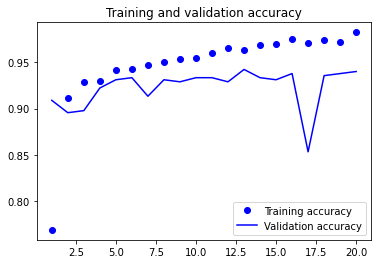

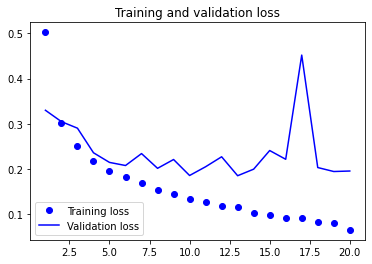

In [14]:
# test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

# print(f"Test accuracy: {test_acc:.3f}",
#       f"\nTest loss: {test_loss:.3f}",
#       f"\nTrue positive: {true_pos:.3f}",
#       f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [15]:
# kernel size = 4

In [16]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=4, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=4, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=4, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=4, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=4, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 8s 47ms/step - loss: 0.5625 - accuracy: 0.7010 - true_positives_3: 639.0000 - true_negatives_3: 833.0000 - val_loss: 0.4683 - val_accuracy: 0.8444 - val_true_positives_3: 172.0000 - val_true_negatives_3: 208.0000
Epoch 2/20
132/132 [==============================] - 6s 45ms/step - loss: 0.4265 - accuracy: 0.8329 - true_positives_3: 869.0000 - true_negatives_3: 880.0000 - val_loss: 0.4440 - val_accuracy: 0.8200 - val_true_positives_3: 145.0000 - val_true_negatives_3: 224.0000
Epoch 3/20
132/132 [==============================] - 7s 51ms/step - loss: 0.3533 - accuracy: 0.8781 - true_positives_3: 916.0000 - true_negatives_3: 928.0000 - val_loss: 0.3339 - val_accuracy: 0.8844 - val_true_positives_3: 177.0000 - val_true_negatives_3: 221.0000
Epoch 4/20
132/132 [==============================] - 7s 49ms/step - loss: 0.3117 - accuracy: 0.8905 - true_positives_3: 935.0000 - true_negatives_3: 935.0000 - val_loss: 0.4927 - val_accuracy: 0.775

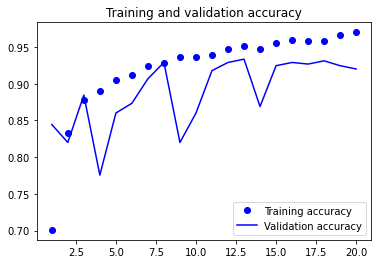

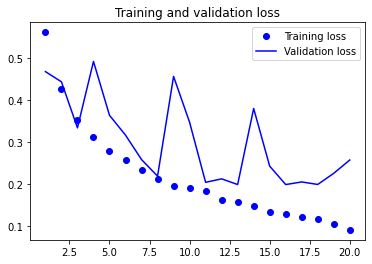

In [17]:
# test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

# print(f"Test accuracy: {test_acc:.3f}",
#       f"\nTest loss: {test_loss:.3f}",
#       f"\nTrue positive: {true_pos:.3f}",
#       f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [18]:
# kernel size = 5

In [19]:
inputs = keras.Input(shape=INPUT_SHAPE)
#-----------------------------------------------------------------
x = inputs
x = layers.Rescaling(1./255)(inputs)
#---------------------------------------------------------------------------------------
x = layers.Conv2D(filters=8, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=5, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dense(8, activation="sigmoid")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])


history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = EPOCHS)

Epoch 1/20
132/132 [==============================] - 8s 43ms/step - loss: 0.5632 - accuracy: 0.7119 - true_positives_4: 630.0000 - true_negatives_4: 865.0000 - val_loss: 0.4400 - val_accuracy: 0.8133 - val_true_positives_4: 151.0000 - val_true_negatives_4: 215.0000
Epoch 2/20
132/132 [==============================] - 6s 40ms/step - loss: 0.3764 - accuracy: 0.8543 - true_positives_4: 895.0000 - true_negatives_4: 899.0000 - val_loss: 0.3573 - val_accuracy: 0.8667 - val_true_positives_4: 205.0000 - val_true_negatives_4: 185.0000
Epoch 3/20
132/132 [==============================] - 6s 41ms/step - loss: 0.3180 - accuracy: 0.8805 - true_positives_4: 926.0000 - true_negatives_4: 923.0000 - val_loss: 0.2809 - val_accuracy: 0.9022 - val_true_positives_4: 196.0000 - val_true_negatives_4: 210.0000
Epoch 4/20
132/132 [==============================] - 6s 41ms/step - loss: 0.2716 - accuracy: 0.9086 - true_positives_4: 956.0000 - true_negatives_4: 952.0000 - val_loss: 0.2708 - val_accuracy: 0.906

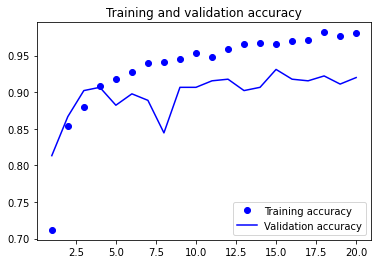

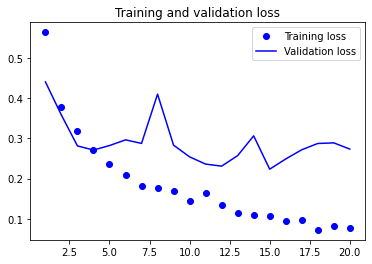

In [20]:
# test_loss, test_acc, true_pos, true_neg = model.evaluate(test_dataset)

# print(f"Test accuracy: {test_acc:.3f}",
#       f"\nTest loss: {test_loss:.3f}",
#       f"\nTrue positive: {true_pos:.3f}",
#       f"\nTest accuracy: {true_neg:.3f}")

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()